# DEVELOPMENT C3 WEEK 1

Explanataion of the task...

This task has many ways to solve it. First, we have to decide which local descriptor we are will use: SIFT, Dense SIFT, ORB or AKAZE. Each one will be tested first with a standard configuration and see which are the results.

In [1]:
import os
import json
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from main import run_experiment

In [4]:
# Load experiments from JSON
config_path = "configs/local_descriptors.json"

if not os.path.exists(config_path):
    raise FileNotFoundError(f"Please create the file {config_path} first!")

with open(config_path, "r") as f:
    experiments_list = json.load(f)

results_data = []
print(f"Loaded {len(experiments_list)} experiments from {config_path}")

# Run Loop
for exp in experiments_list:
    run_name = exp["name"]
    cfg = exp["config"]
    
    print(f"\n==========================================")
    print(f"Running: {run_name}")
    print(f"==========================================")
    
    start_time = time.time()
    
    # Execute
    acc = run_experiment(cfg)
    
    duration = time.time() - start_time
    
    results_data.append({
        "Descriptor": run_name,
        "Test Accuracy": acc,
        "Time (s)": duration
    })

print("\nAll experiments finished.")

Loaded 3 experiments from configs/local_descriptors.json

Running: SIFT (N=500)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 500...


Fitting Codebook: 100%|██████████| 8700/8700 [00:07<00:00, 1196.15it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:05<00:00, 1480.78it/s]
Traceback (most recent call last):
  File "/home/alvaro/anaconda3/envs/env-c3/lib/python3.14/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 297, in main
    raise ValueError(
    ...<4 lines>...
    )
ValueError: Cannot register "REGISTER","rtype":"folder","base64_name" for automatic cleanup: unknown resource type ("L2Rldi9zaG0vam9ibGliX21lbW1hcHBpbmdfZm9sZGVyXzIyMzA2X2I0ODMxYTc4NGMyNTRhZWU4YjQxOGI3MTFhMzk0NTc0X2Y3OTBhM2U1NjJlMDQwNDVhZGExYzAyYTgxNmRiYTZj"}). Resource type should be one of the following: ['noop', 'folder', 'file', 'semlock']
Traceback (most recent call last):
  File "/home/alvaro/anaconda3/envs/env-c3/lib/python3.14/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 297, in main
    raise ValueError(
    ...<4 lines>...
    )
ValueError: Cannot register "REGISTER","rtype":"folder","base64_name" for automatic cleanup: unknown resource type ("L2Rldi

Fitting the classifier: LogisticRegression...
Performing Cross-Validation...


Traceback (most recent call last):
  File "/home/alvaro/anaconda3/envs/env-c3/lib/python3.14/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 297, in main
    raise ValueError(
    ...<4 lines>...
    )
ValueError: Cannot register "MAYBE_UNLINK","rtype":"file","base64_name" for automatic cleanup: unknown resource type ("L2Rldi9zaG0vam9ibGliX21lbW1hcHBpbmdfZm9sZGVyXzIyMzA2X2U3NzhmMjMzODU4ODRlYmQ4OThlZTk3OTdkMGVmMzcyXzdlM2M0YjY3MTk2ZTQzMWNiMmJiZjNhOTkzNDI5ZGNkLzIyMzA2LTEzNzQ4MDU5MDc1NTA4OC0xZmZmMmIxYzczZDM0MDE4OWU1ODlhM2JjZWYyZTBlZS5wa2w="}). Resource type should be one of the following: ['noop', 'folder', 'file', 'semlock']
Traceback (most recent call last):
  File "/home/alvaro/anaconda3/envs/env-c3/lib/python3.14/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 297, in main
    raise ValueError(
    ...<4 lines>...
    )
ValueError: Cannot register "MAYBE_UNLINK","rtype":"file","base64_name" for automatic cleanup: unknown resource type ("L2R

CV Accuracy: 0.2668 (+/- 0.0053)
Accuracy on Phase [Train]: 0.2908
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:01<00:00, 1443.75it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2818

Running: ORB (N=500)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 500...


Fitting Codebook: 100%|██████████| 8700/8700 [00:06<00:00, 1411.42it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:04<00:00, 2033.00it/s]
Traceback (most recent call last):
  File "/home/alvaro/anaconda3/envs/env-c3/lib/python3.14/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 297, in main
    raise ValueError(
    ...<4 lines>...
    )
ValueError: Cannot register "REGISTER","rtype":"folder","base64_name" for automatic cleanup: unknown resource type ("L2Rldi9zaG0vam9ibGliX21lbW1hcHBpbmdfZm9sZGVyXzIyMzA2XzIxYjVjYmJkY2ZkMjRiMmM4YTg3NjQ5NjNjMTY3NDE3XzVhMDEzYjQ4YjNmMTRkZDRhMTE5ZWYwZTBjZWJjMjBm"}). Resource type should be one of the following: ['noop', 'folder', 'file', 'semlock']
Traceback (most recent call last):
  File "/home/alvaro/anaconda3/envs/env-c3/lib/python3.14/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 297, in main
    raise ValueError(
    ...<4 lines>...
    )
ValueError: Cannot register "REGISTER","rtype":"folder","base64_name" for automatic cleanup: unknown resource type ("L2Rldi

Fitting the classifier: LogisticRegression...
Performing Cross-Validation...


Traceback (most recent call last):
  File "/home/alvaro/anaconda3/envs/env-c3/lib/python3.14/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 297, in main
    raise ValueError(
    ...<4 lines>...
    )
ValueError: Cannot register "MAYBE_UNLINK","rtype":"file","base64_name" for automatic cleanup: unknown resource type ("L2Rldi9zaG0vam9ibGliX21lbW1hcHBpbmdfZm9sZGVyXzIyMzA2X2U3NzhmMjMzODU4ODRlYmQ4OThlZTk3OTdkMGVmMzcyX2RkZWJkN2IzNThjMDQ5MGNhZDk1MDBiZmJlNTdmNTNiLzIyMzA2LTEzNzQ4MDU5MDc1NTA4OC1kNGVhYjUzOWE4MTE0ZTI2OGE3NTgwNmQ5MTE5M2U4ZS5wa2w="}). Resource type should be one of the following: ['noop', 'folder', 'file', 'semlock']
Traceback (most recent call last):
  File "/home/alvaro/anaconda3/envs/env-c3/lib/python3.14/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 297, in main
    raise ValueError(
    ...<4 lines>...
    )
ValueError: Cannot register "MAYBE_UNLINK","rtype":"file","base64_name" for automatic cleanup: unknown resource type ("L2R

CV Accuracy: 0.1787 (+/- 0.0097)
Accuracy on Phase [Train]: 0.2059
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:01<00:00, 1822.70it/s]


Predicting values...
Accuracy on Phase [Test]: 0.1682

Running: AKAZE (Default)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 500...


Fitting Codebook: 100%|██████████| 8700/8700 [00:05<00:00, 1685.00it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:03<00:00, 2737.06it/s]
Traceback (most recent call last):
  File "/home/alvaro/anaconda3/envs/env-c3/lib/python3.14/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 297, in main
    raise ValueError(
    ...<4 lines>...
    )
ValueError: Cannot register "REGISTER","rtype":"folder","base64_name" for automatic cleanup: unknown resource type ("L2Rldi9zaG0vam9ibGliX21lbW1hcHBpbmdfZm9sZGVyXzIyMzA2X2UyNmQ3YWFhMjJmZDQ4ZmJhMzRmYmI0YWRlNWUzODJiXzIyNmIzNDM2NmNjMzQ3NmE5ZTUxNWNhM2YwMmVkYmU0"}). Resource type should be one of the following: ['noop', 'folder', 'file', 'semlock']
Traceback (most recent call last):
  File "/home/alvaro/anaconda3/envs/env-c3/lib/python3.14/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 297, in main
    raise ValueError(
    ...<4 lines>...
    )
ValueError: Cannot register "REGISTER","rtype":"folder","base64_name" for automatic cleanup: unknown resource type ("L2Rldi

Fitting the classifier: LogisticRegression...
Performing Cross-Validation...


Traceback (most recent call last):
  File "/home/alvaro/anaconda3/envs/env-c3/lib/python3.14/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 297, in main
    raise ValueError(
    ...<4 lines>...
    )
ValueError: Cannot register "MAYBE_UNLINK","rtype":"file","base64_name" for automatic cleanup: unknown resource type ("L2Rldi9zaG0vam9ibGliX21lbW1hcHBpbmdfZm9sZGVyXzIyMzA2X2U3NzhmMjMzODU4ODRlYmQ4OThlZTk3OTdkMGVmMzcyXzk5Y2M2M2VmYmRlZTRhMTc5ODQ2ZjBlZmI0ZmZmNGY0LzIyMzA2LTEzNzQ4MDU5MDc1NTA4OC04ZjAyNzgxMTFkNmE0M2E5ODM0NGJhMmQ2NDM0M2U2NC5wa2w="}). Resource type should be one of the following: ['noop', 'folder', 'file', 'semlock']
Traceback (most recent call last):
  File "/home/alvaro/anaconda3/envs/env-c3/lib/python3.14/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 297, in main
    raise ValueError(
    ...<4 lines>...
    )
ValueError: Cannot register "MAYBE_UNLINK","rtype":"file","base64_name" for automatic cleanup: unknown resource type ("L2R

CV Accuracy: 0.1884 (+/- 0.0045)
Accuracy on Phase [Train]: 0.2175
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:01<00:00, 2172.75it/s]


Predicting values...
Accuracy on Phase [Test]: 0.1814

All experiments finished.


In [6]:
# 1. Process the raw data to unpack the tuple
cleaned_results = []

for item in results_data:
    # currently item['Test Accuracy'] contains (train_acc, test_acc)
    train_acc, test_acc = item['Test Accuracy'] 
    
    cleaned_results.append({
        "Descriptor": item['Descriptor'],
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Time (s)": item['Time (s)']
    })

# 2. Create DataFrame
df = pd.DataFrame(cleaned_results)

# Display cleaned table
print("Processed Results:")
display(df)

Processed Results:


,Descriptor,Train Accuracy,Test Accuracy,Time (s)
0,SIFT (N=500),0.290805,0.281818,27.398227
1,ORB (N=500),0.205862,0.168182,24.898453
2,AKAZE (Default),0.217471,0.181364,21.602369


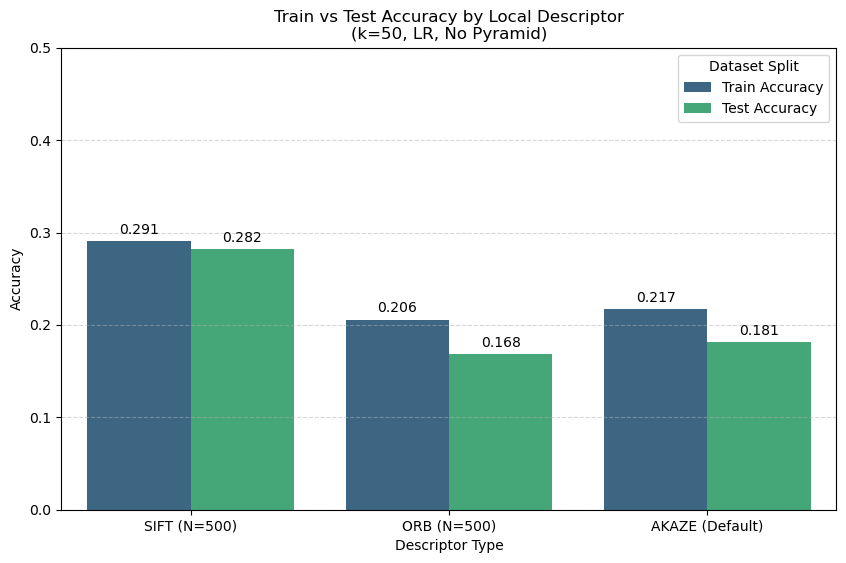

Traceback (most recent call last):
  File "/home/alvaro/anaconda3/envs/env-c3/lib/python3.14/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 297, in main
    raise ValueError(
    ...<4 lines>...
    )
ValueError: Cannot register "UNREGISTER","rtype":"semlock","base64_name" for automatic cleanup: unknown resource type ("L2xva3ktMjIzMDYtemh4cWJyN2w="}). Resource type should be one of the following: ['noop', 'folder', 'file', 'semlock']
Traceback (most recent call last):
  File "/home/alvaro/anaconda3/envs/env-c3/lib/python3.14/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 297, in main
    raise ValueError(
    ...<4 lines>...
    )
ValueError: Cannot register "UNREGISTER","rtype":"semlock","base64_name" for automatic cleanup: unknown resource type ("L2xva3ktMjIzMDYta3I4bWF6bWY="}). Resource type should be one of the following: ['noop', 'folder', 'file', 'semlock']
Traceback (most recent call last):
  File "/home/alvaro/anaconda3/envs/env-c

In [7]:
# 3. Prepare data for Seaborn (Melt to long format)
df_melted = df.melt(
    id_vars=["Descriptor"], 
    value_vars=["Train Accuracy", "Test Accuracy"], 
    var_name="Split", 
    value_name="Accuracy"
)

# 4. Plot
plt.figure(figsize=(10, 6))

# Grouped Bar Plot
ax = sns.barplot(
    x="Descriptor", 
    y="Accuracy", 
    hue="Split", 
    data=df_melted, 
    palette="viridis"
)

# Add numeric labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3)

plt.title("Train vs Test Accuracy by Local Descriptor\n(k=50, LR, No Pyramid)")
plt.ylim(0, 0.5) # Adjusted limit since values are around 0.2 - 0.3
plt.ylabel("Accuracy")
plt.xlabel("Descriptor Type")
plt.legend(title="Dataset Split", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()